In [1]:
import numpy as np
import torch
from higherOrderKME import sigkernel

In [12]:
X_seed=10
Y_seed=1
initial_value = 1.0

num_permutations = 10000
n_samples = 100
sample_len = 60
dt = 1 / 252
percentile = 0.95

In [13]:
# Specify the static kernel (for linear kernel use sigkernel.LinearKernel())
# static_kernel = sigkernel.RBFKernel(sigma=0.5)
static_kernel = sigkernel.LinearKernel()

# Specify dyadic order for PDE solver (int > 0, default 0, the higher the more accurate but slower)
dyadic_order = 6

# Specify the hyperparameter for the estimation of the conditional KME
lambda_ = 1e-5

# # Initialize the corresponding signature kernel
# signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)

# # Synthetic data
# n, len_x, len_y, dim = 100, 10, 20, 2
# x = torch.rand((n,len_x,dim), dtype=torch.float64, device='cuda') # shape (batch,len_x,dim)
# y = torch.rand((n,len_y,dim), dtype=torch.float64, device='cuda') # shape (batch,len_y,dim)

# # Compute the (classical) first order MMD distance between samples x ~ P and samples y ~ Q, where P,Q are two distributions on path space
# mmd_order1 = signature_kernel.compute_mmd(x, y, order=1)

# # Compute the second order MMD distance between samples x ~ P and samples y ~ Q, where P,Q are two distributions on path space
# mmd_order2 = signature_kernel.compute_mmd(x, y, lambda_=lambda_, order=2)

In [14]:
X = sigkernel.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len, seed=X_seed).astype(np.float64) * initial_value
log_X = np.log(X)
Y = sigkernel.tests.gen_GBM_path(0.5, 0.2, dt, n_samples, sample_len, seed=Y_seed).astype(np.float64) * initial_value
log_Y = np.log(Y)

c:\Git\higherOrderKME\higherOrderKME\sigkernel\sigkernel.py:630: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3281.)
  to_inv_XX = to_inv_XX.T


Mean of permutation statistics: 0.04156347668445868


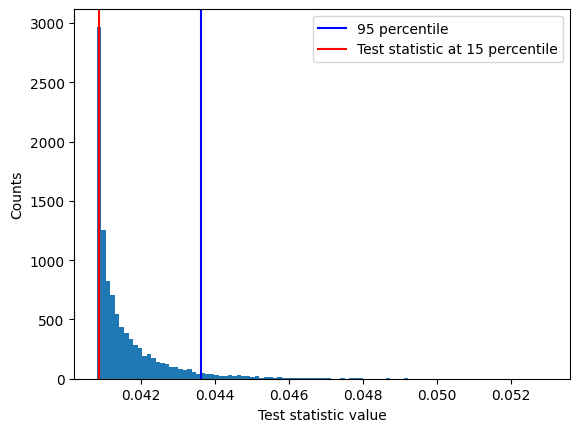

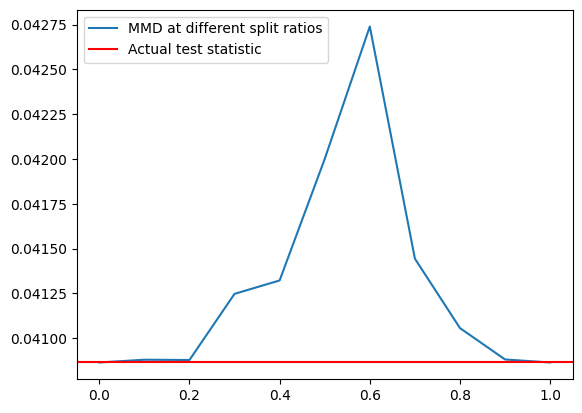

In [5]:
mmd_XY, null_mmd = sigkernel.tests.sig_kernel_test(X, Y, dyadic_order=dyadic_order, static_kernel=static_kernel, lambda_=lambda_,
                                                   num_permutations=num_permutations, percentile=percentile)
print(f'Mean of permutation statistics: {np.mean(null_mmd)}')

In [15]:
idx = np.full((sample_len), False)
idx[0] = True
idx[-1] = True
X[:,idx,:].shape

(100, 2, 1)

Mean of permutation statistics: 0.020455097065834177


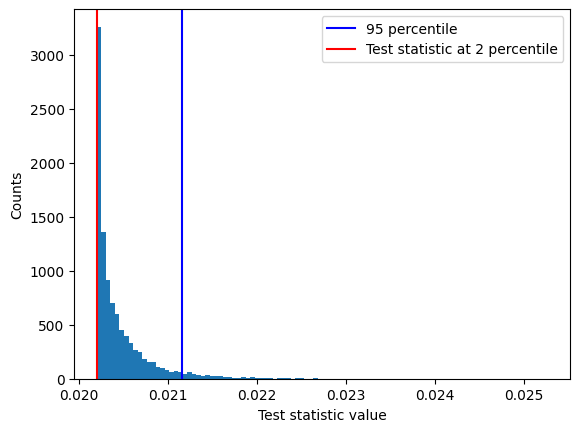

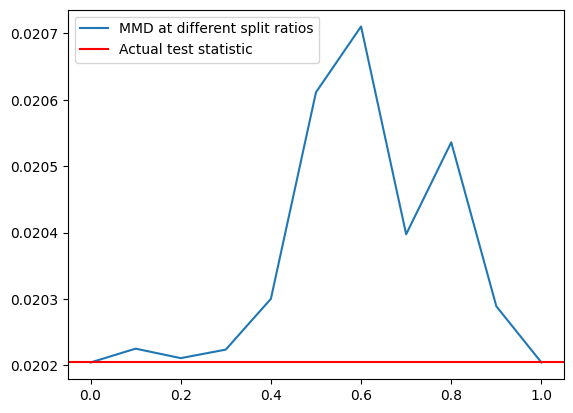

In [16]:
mmd_XY, null_mmd = sigkernel.tests.sig_kernel_test(X[:,idx,:], Y[:,idx,:], dyadic_order=dyadic_order, static_kernel=static_kernel, lambda_=lambda_,
                                                   num_permutations=num_permutations, percentile=percentile)
print(f'Mean of permutation statistics: {np.mean(null_mmd)}')